# Money transaction in Austrialia
### Exploratory Data Analysis
This sythestic data is made by InsideSherpa.com for data analysis online intership projects. 

Certification: 
  * [**Certificate Link**](https://insidesherpa.s3.amazonaws.com/completion-certificates/ANZ/ZLJCsrpkHo9pZBJNY_ANZ_tXX97kn6agm3bNYHR_completion_certificate.pdf)

download the data set at the following link:

* [**Dataset Download Link**](https://www.insidesherpa.com/modules/ZLJCsrpkHo9pZBJNY/BnwCTubtx8NW5W5Kr)

## 1. Data Preparation

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
import datetime
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy import stats
from scipy.stats import normaltest
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Read the data
url = r'C:\Users\Xiang Fu\Desktop\Analysis\ANZ synthesised transaction dataset.xlsx'
df = pd.read_excel(url)
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [5]:
df.shape

(12043, 23)

In [10]:
# exame if there is any missing data
print(df.info())
print("-"*80)
print(df.isnull().sum())
print("-"*80)
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [11]:
number_of_duplicates = df.duplicated().sum()
number_of_rows = df.shape[0]
print("{}% of the observations are duplicates.".format(round(number_of_duplicates/number_of_rows*100,1)))

0.0% of the observations are duplicates.


## 2. Data Visualization
### 2.1 Monthly transaction frequency

In [89]:
customer = df[['customer_id','amount','balance','date','age','gender']].copy()
customer['Month'] = df['date'].dt.month
customer = customer.dropna()

In [90]:
monthly_data = customer.groupby(['customer_id','gender','age','balance','Month'])['amount'].sum().reset_index()
monthly_data.head()

,customer_id,gender,age,balance,Month,amount
0,CUS-1005756958,F,53,41.40,8,11.17
1,CUS-1005756958,F,53,52.57,8,13.96
2,CUS-1005756958,F,53,66.53,8,33.70
3,CUS-1005756958,F,53,100.23,8,16.66
4,CUS-1005756958,F,53,116.89,8,17.89


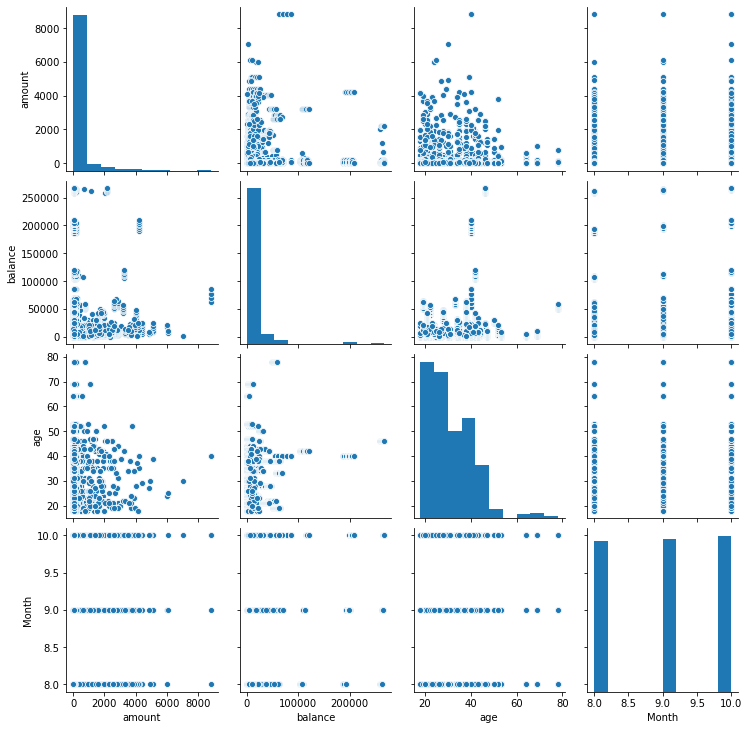

In [91]:
sns.pairplot(customer)

### 2.2 Monthly money transaction by different ages

In [92]:
age_cate = monthly_data.groupby(['age','Month'])['amount'].sum().reset_index()
age_cate['age'] = age_cate['age'].astype(int)

In [93]:
customer['extraction'] = pd.to_datetime(df['extraction'])
customer.insert(loc=len(customer.columns), column='time', value=customer['extraction'].dt.strftime('%H:%M:%S')) 

In [94]:
customer['weekday'] = customer['date'].dt.dayofweek

In [95]:
weekly_cate = customer.groupby(['weekday','Month','age','gender'])['amount'].sum().reset_index()

In [96]:
dict = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
weekly_Aug = weekly_cate.copy().loc[weekly_cate['Month'] == 8]
weekly_Aug['weekday'] = weekly_Aug['weekday'].map(dict) 

weekly_Sep = weekly_cate.copy().loc[weekly_cate['Month'] == 9]
weekly_Sep['weekday'] = weekly_Sep['weekday'].map(dict)

weekly_Oct = weekly_cate.copy().loc[weekly_cate['Month'] == 10]
weekly_Oct['weekday'] = weekly_Oct['weekday'].map(dict)

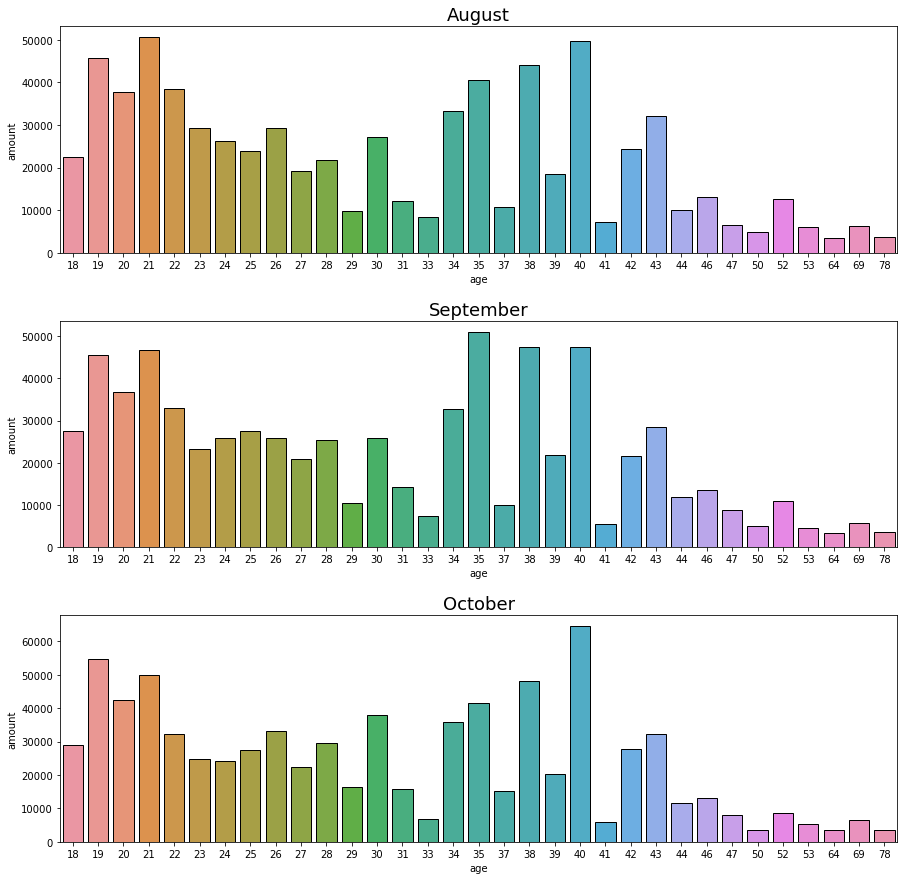

In [97]:
plt.figure(figsize = (15,15))

plt.subplot(3, 1, 1)
bar_1 = age_cate.loc[age_cate['Month'] == 8]
sns.barplot(x="age", y="amount", data=bar_1, dodge=False, edgecolor="k"*len(bar_1))
plt.title('August',fontsize = 18)

plt.subplot(3, 1, 2)
bar_2 = age_cate.loc[age_cate['Month'] == 9]
sns.barplot(x="age", y="amount", data=bar_2, dodge=False, edgecolor="k"*len(bar_2))
plt.title('September',fontsize = 18)

plt.subplot(3, 1, 3)
bar_3 = age_cate.loc[age_cate['Month'] == 10]
sns.barplot(x="age", y="amount", data=bar_3, dodge=False, edgecolor="k"*len(bar_3))
plt.title('October',fontsize = 18)

plt.subplots_adjust(wspace= 0.2, hspace = 0.3)
plt.show()

In [98]:
week_8 = weekly_Aug.groupby('weekday')['amount'].sum().reset_index()
week_9 = weekly_Sep.groupby('weekday')['amount'].sum().reset_index()
week_10 = weekly_Oct.groupby('weekday')['amount'].sum().reset_index()

In [99]:
age_8 = weekly_Aug.groupby(['weekday','age'])['amount'].sum().reset_index()
age_9 = weekly_Sep.groupby(['weekday','age'])['amount'].sum().reset_index()
age_10 = weekly_Oct.groupby(['weekday','age'])['amount'].sum().reset_index()

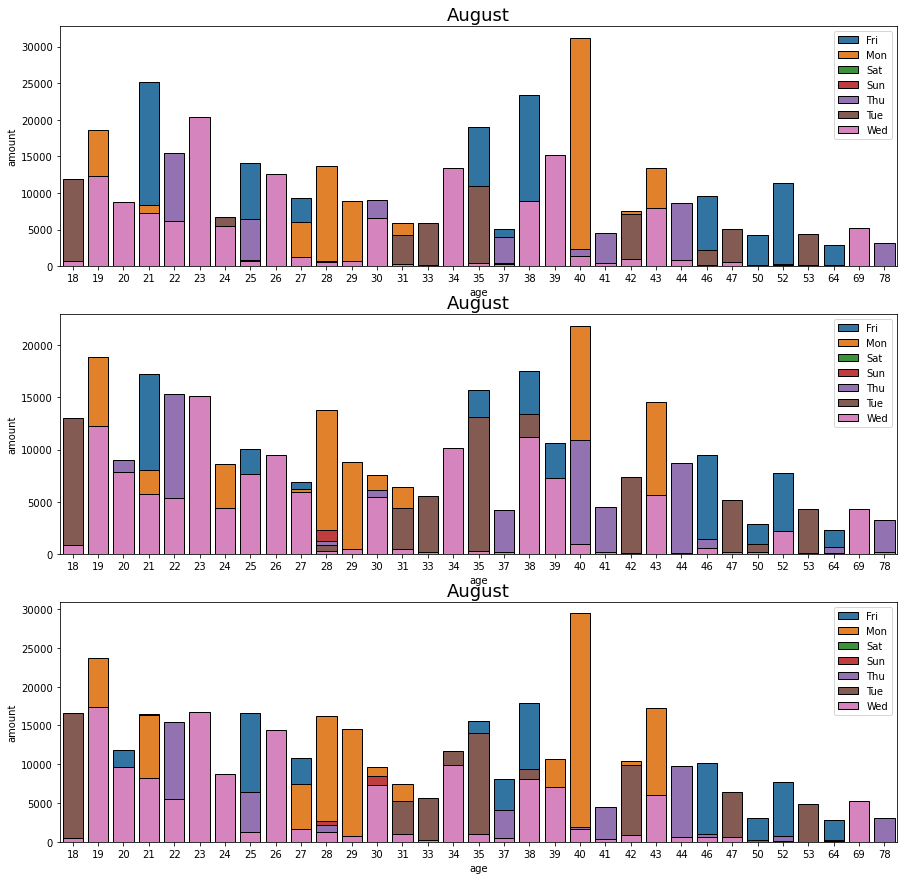

In [100]:
plt.figure(figsize = (15,15))

plt.subplot(3, 1, 1)
sns.barplot(x="age", y="amount", hue = 'weekday', data=age_8, dodge=False, edgecolor="k"*len(age_8))
plt.title('August',fontsize = 18)
plt.legend(loc = 'upper right')

plt.subplot(3, 1, 2)
sns.barplot(x="age", y="amount", hue = 'weekday', data=age_9, dodge=False, edgecolor="k"*len(age_9))
plt.title('August',fontsize = 18)
plt.legend(loc = 'upper right')

plt.subplot(3, 1, 3)
sns.barplot(x="age", y="amount", hue = 'weekday', data=age_10, dodge=False, edgecolor="k"*len(age_10))
plt.title('August',fontsize = 18)
plt.legend(loc = 'upper right')

plt.show()

### 2.2 Monthly money transaction by gender and months

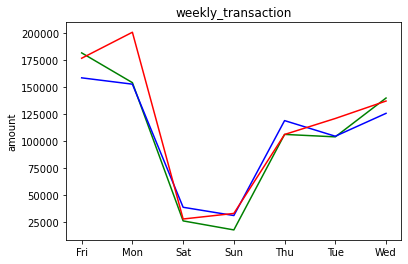

In [101]:
plt.plot(week_8.weekday,week_8.amount,color = 'g')
plt.plot(week_9.weekday,week_9.amount,color = 'b')
plt.plot(week_10.weekday,week_10.amount,color = 'r')
plt.title('weekly_transaction')
plt.ylabel('amount')

plt.show()

In [102]:
gender_8 = weekly_Aug.groupby(['weekday','gender'])['amount'].sum().reset_index()
gender_9 = weekly_Sep.groupby(['weekday','gender'])['amount'].sum().reset_index()
gender_10 = weekly_Oct.groupby(['weekday','gender'])['amount'].sum().reset_index()

In [103]:
gender_8_F = gender_8.loc[gender_8['gender'] == 'F']
gender_8_M = gender_8.loc[gender_8['gender'] == 'M']

gender_9_F = gender_9.loc[gender_9['gender'] == 'F']
gender_9_M = gender_9.loc[gender_9['gender'] == 'M']

gender_10_F = gender_10.loc[gender_10['gender'] == 'F']
gender_10_M = gender_10.loc[gender_10['gender'] == 'M']

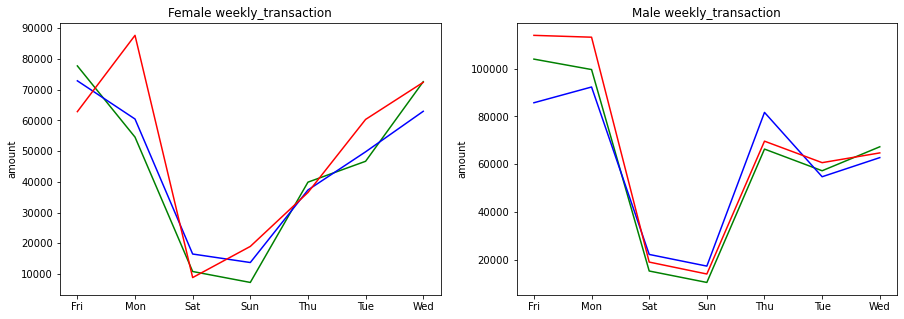

In [104]:
plt.figure(figsize = (15,5))

plt.subplot(1, 2, 1)
plt.plot(gender_8_F.weekday,gender_8_F.amount,color = 'g')
plt.plot(gender_9_F.weekday,gender_9_F.amount,color = 'b')
plt.plot(gender_10_F.weekday,gender_10_F.amount,color = 'r')
plt.title('Female weekly_transaction')
plt.ylabel('amount')

plt.subplot(1, 2, 2)
plt.plot(gender_8_M.weekday,gender_8_M.amount,color = 'g')
plt.plot(gender_9_M.weekday,gender_9_M.amount,color = 'b')
plt.plot(gender_10_M.weekday,gender_10_M.amount,color = 'r')
plt.title('Male weekly_transaction')
plt.ylabel('amount')

plt.show()

In [105]:
gender_cate = monthly_data.groupby(['gender','Month'])['amount'].sum().reset_index()

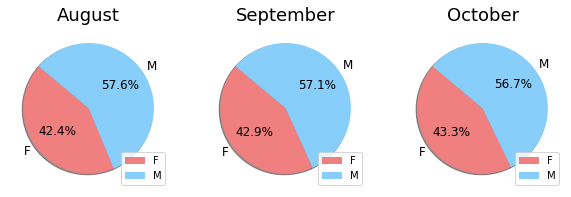

In [106]:
plt.figure(figsize = (10,3))
colors = ['lightcoral', 'lightskyblue']

plt.subplot(1, 3, 1)
pie_1 = gender_cate.loc[gender_cate['Month'] == 8]
plt.pie(pie_1['amount'], labels = pie_1['gender'], colors = colors, 
        textprops={'fontsize': 12},autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('August',fontsize = 18)
plt.legend(loc = 'lower right')

plt.subplot(1, 3, 2)
pie_2 = gender_cate.loc[gender_cate['Month'] == 9]
plt.pie(pie_2['amount'], labels = pie_2['gender'], colors = colors, 
        textprops={'fontsize': 12},autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('September',fontsize = 18)
plt.legend(loc = 'lower right')

plt.subplot(1, 3, 3)
pie_3 = gender_cate.loc[gender_cate['Month'] == 10]
plt.pie(pie_3['amount'], labels = pie_3['gender'], colors = colors, 
        textprops={'fontsize': 12},autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('October',fontsize = 18)
plt.legend(loc = 'lower right')

plt.show()

## 3. Time-series Features

Now let's see how date changes over time. 

### 3.1 Plot the data to find possible time  series

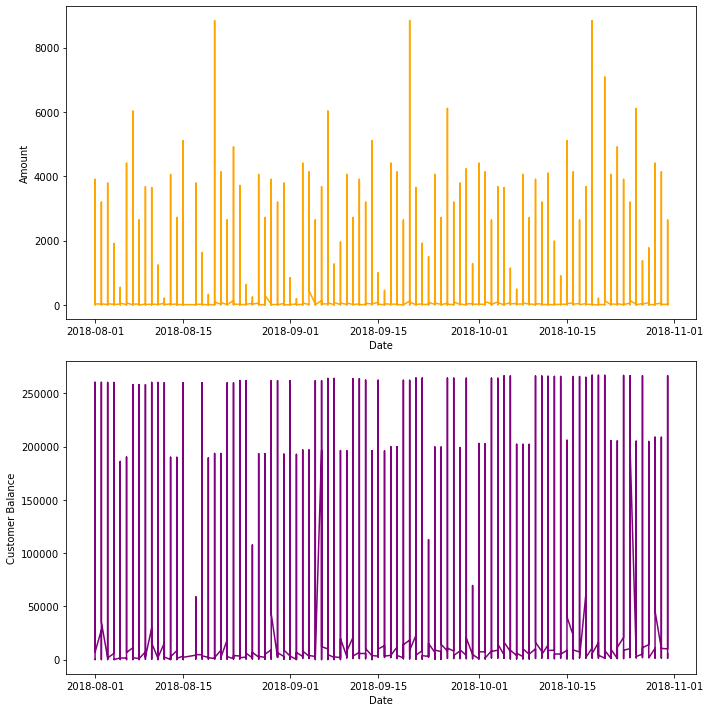

In [538]:
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.plot(df['date'],df['amount'], color='Orange', )

plt.xlabel("Date")
plt.ylabel('Amount')
plt.subplot(212)
plt.plot(df['date'],df['balance'], color='Purple',
         markerfacecolor='orange', markersize=12)
plt.xlabel("Date")
plt.ylabel('Customer Balance')
plt.tight_layout()

### The 'Amount' featute has a time series trend, while 'Balance' feature is not.

### 3.2 Prepare the data

In [108]:
# arrange the data into a new dataframe
dateparse = lambda dates: pd.datetime.strtime(dates,'%Y-%m')
predict_1 = pd.DataFrame(df[['date','amount']])
predict_1.head()

,date,amount
0,2018-08-01,16.25
1,2018-08-01,14.19
2,2018-08-01,6.42
3,2018-08-01,40.90
4,2018-08-01,3.25


In [109]:
# sum everyday amount to daily amount, get rid of possible big derivation in days
def daily_amount(data):
    daily_data = data.copy()
    daily_data.date = daily_data.date.apply(lambda x: str(x)[:-4])
    daily_data = daily_data.groupby('date')['amount'].sum().reset_index()
    daily_data.date = pd.to_datetime(daily_data.date)
    return daily_data

In [156]:
# clean the data
daily_df = daily_amount(predict_1)
daily_df = daily_df.dropna()

daily_df.head()

,date,amount
0,2018-08-01,29867.94
1,2018-08-02,21786.32
2,2018-08-03,38096.58
3,2018-08-04,6296.05
4,2018-08-05,4426.50


In [157]:
# check the intervene of money transation in time period
def time_plot(data, x, y, topic):
    fig, ax = plt.subplots(figsize=(10,5))
    sns.lineplot(x, y, data=data, ax=ax, color='mediumblue', label='Total Sales')
    ax.set(xlabel = "{}".format(x),
            ylabel = "{}".format(y),
            title = topic)   

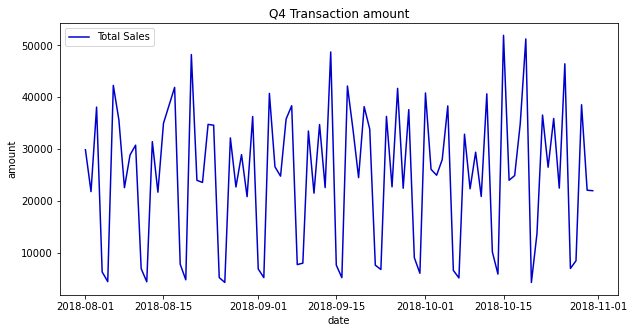

In [158]:
time_plot(daily_df, 'date', 'amount', 'Q4 Transaction amount')

* The data looks to be in stationary
* The data has a seemingly trend occurs in every 1 week (7 days)

In [161]:
# reset the date to index for the amount
daily_df = daily_df.copy().set_index('date')
daily_df.head()

,amount
date,
2018-08-01,29867.94
2018-08-02,21786.32
2018-08-03,38096.58
2018-08-04,6296.05
2018-08-05,4426.50


In [162]:
# examine if the data is stationary by the Augmented Dickey Fuller test (adfuller())
# data stationary is based on : mean value, standard deviation (std) and covariance
def test_stationarity(timeseries, window):
    rolmean = timeseries.rolling(window = window).mean()
    rolstd = timeseries.rolling(window = window).std()
    dftest = adfuller(timeseries, autolag = 'AIC') # 
    # the output of dftest is in an order of : test statistic, p value, lags used, observation and critical value of each confidence
    dfoutput = pd.Series(dftest[0:4], index = ['test statistic', 'p value', 'lags used', 'observation used'])
    for key,value in dftest[4].items():
        dfoutput['critical value(%s)' %key] = value
    # plot the rolling statics
    fig = plt.figure(figsize =(10,5))
    fig.add_subplot()
    original = plt.plot(timeseries, label = 'original')
    mean = plt.plot(rolmean, color = 'r', label = 'rolling mean')
    std = plt.plot(rolstd, color = 'black', label = 'rolling std')
    plt.legend(loc = 'best')
    print('Results of Dickey-Fuller Test:\n', dfoutput)

Results of Dickey-Fuller Test:
 test statistic         -3.861381
p value                 0.002338
lags used              12.000000
observation used       78.000000
critical value(1%)     -3.517114
critical value(5%)     -2.899375
critical value(10%)    -2.586955
dtype: float64


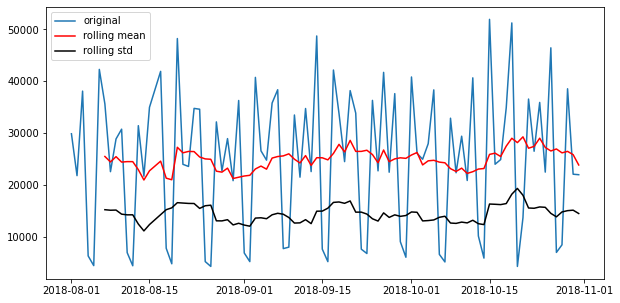

In [294]:
test_stationarity(daily_df,7)

* the p value is 0.002338 less than the significance level (0.05)
* Also, test statistic < critical values means it will reject null hypothesis, the data is stationary

In [539]:
# use the differences between each time point to see if the data could be more stable
daily_df_2 = daily_df.diff().dropna()

Results of Dickey-Fuller Test:
 test statistic         -5.408789
p value                 0.000003
lags used              12.000000
observation used       77.000000
critical value(1%)     -3.518281
critical value(5%)     -2.899878
critical value(10%)    -2.587223
dtype: float64


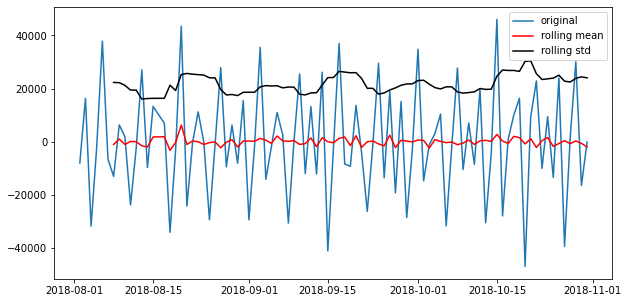

In [398]:
test_stationarity(daily_df_2,7)

* the rolling mean and the p-value both suggest daily_df_2 is better to be analyzed

### 3.2 Select the proper model

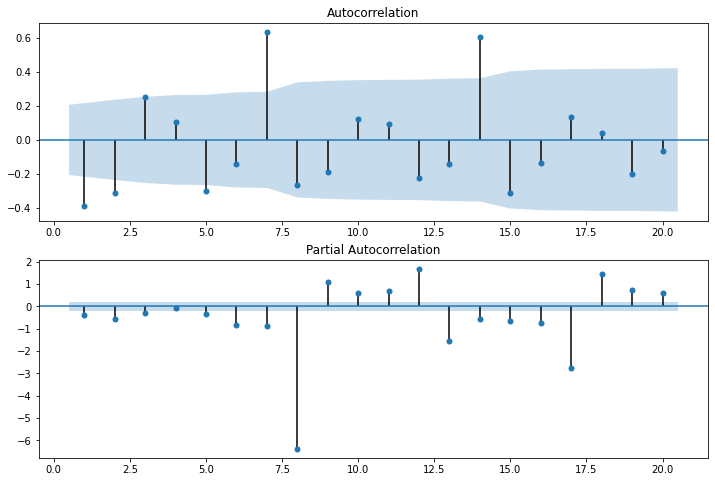

In [329]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot ACF and PACF
plot_acf(daily_df_2, lags=20, zero=False, ax=ax1)
plot_pacf(daily_df_2, lags=20, zero=False, ax=ax2)

# Show plot
plt.show()

Here is the explanation of selecting p and q from ACF and PACF:

||AR(q) | MA(p) | ARMA(p,q) |
| --- | --- | --- |--- |
| ACF | Tails off after lag q| Cuts off after lag q| Tails off after lag q |
| PACF | Cuts off after lag p | Tails off after lag p| Tails off after lag p |

This model looks like as a MA(8) model, use the function and AIC and BIC to exame it.

In [319]:
def decompose(timeseries, n):
    decomposition = seasonal_decompose(timeseries, freq = n) 
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    plt.subplots(figsize =(12,12))
    plt.subplot(411)
    plt.plot(timeseries, label = 'Original')
    plt.legend(loc = 'best')
    plt.subplot(412)
    plt.plot(trend, label = 'Trend')
    plt.legend(loc = 'best')
    plt.subplot(413)
    plt.plot(seasonal, label = 'Seasonal')
    plt.legend(loc = 'best')
    plt.subplot(414)
    plt.plot(residual, label = 'Residual')
    plt.legend(loc = 'best')
    plt.tight_layout()
    
    return trend, seasonal, residual

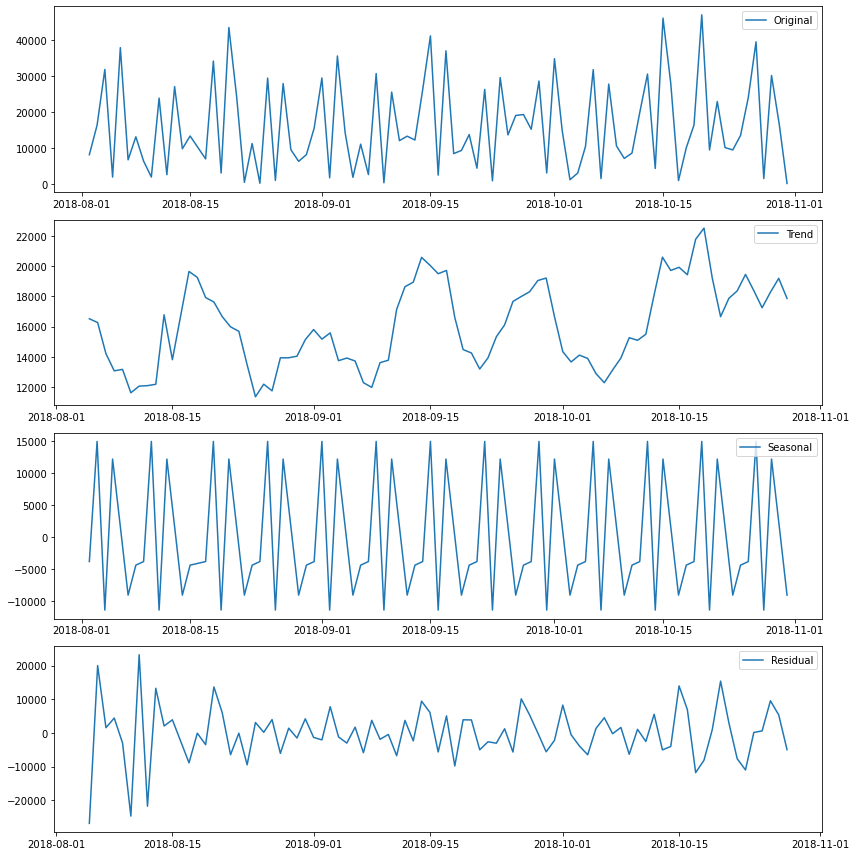

In [320]:
trend, seasonal, residual = decompose(daily_df_2,7) 
# freq is the periodic frequency of tendancy, 7 is a week
residual.dropna(inplace = True)

* The decompose plot show that the daily_df_2 is stationary (not apparent trend after diff())

In [321]:
ARIMA_aic_bic = []
for p in range(10):
    for q in range(10):
        try:
            model = ARIMA(daily_df_2,order=(p,1,q))
            results = model.fit()
            ARIMA_aic_bic.append((p,q,results.aic,results.bic))
        except:
            pass
ARIMAX_df = pd.DataFrame(ARIMA_aic_bic, columns = ['p','q','aic','bic'])

In [323]:
ARIMAX_df['AIC+BIC'] = ARIMAX_df['aic'] + ARIMAX_df['bic']
print(ARIMAX_df.sort_values('aic').head())
print(ARIMAX_df.sort_values('bic').head())
print(ARIMAX_df.sort_values('AIC+BIC').head())

    p  q          aic          bic      AIC+BIC
45  9  5  1892.380813  1932.198994  3824.579807
36  6  6  1903.361755  1938.202664  3841.564419
44  9  1  1905.561773  1935.425409  3840.987182
39  7  2  1908.696663  1936.071663  3844.768326
38  7  1  1908.884446  1933.770810  3842.655255
    p  q          aic          bic      AIC+BIC
45  9  5  1892.380813  1932.198994  3824.579807
32  6  0  1912.376305  1932.285396  3844.661700
38  7  1  1908.884446  1933.770810  3842.655255
44  9  1  1905.561773  1935.425409  3840.987182
39  7  2  1908.696663  1936.071663  3844.768326
    p  q          aic          bic      AIC+BIC
45  9  5  1892.380813  1932.198994  3824.579807
44  9  1  1905.561773  1935.425409  3840.987182
36  6  6  1903.361755  1938.202664  3841.564419
38  7  1  1908.884446  1933.770810  3842.655255
32  6  0  1912.376305  1932.285396  3844.661700


In [324]:
SARIMAX_aic_bic = []
for p in range(10):
    for q in range(10):
        try:
            model = SARIMAX(daily_df_2,order=(p,1,q))
            results = model.fit()
            SARIMAX_aic_bic.append((p,q,results.aic,results.bic))
        except:
            pass
SARIMAX_df = pd.DataFrame(SARIMAX_aic_bic, columns = ['p','q','aic','bic'])

In [325]:
SARIMAX_df['AIC+BIC'] = SARIMAX_df['aic'] + SARIMAX_df['bic']
print(SARIMAX_df.sort_values('aic').head())
print(SARIMAX_df.sort_values('bic').head())
print(SARIMAX_df.sort_values('AIC+BIC').head())

    p  q          aic          bic      AIC+BIC
67  6  7  1894.169051  1929.009960  3823.179011
68  6  8  1894.205785  1931.535331  3825.741117
69  6  9  1896.939979  1936.758161  3833.698141
99  9  9  1897.201815  1944.485906  3841.687722
79  7  9  1898.972445  1941.279263  3840.251707
    p  q          aic          bic      AIC+BIC
60  6  0  1911.496151  1928.916606  3840.412757
67  6  7  1894.169051  1929.009960  3823.179011
64  6  4  1902.408378  1929.783378  3832.191757
68  6  8  1894.205785  1931.535331  3825.741117
71  7  1  1909.618795  1932.016523  3841.635318
    p  q          aic          bic      AIC+BIC
67  6  7  1894.169051  1929.009960  3823.179011
68  6  8  1894.205785  1931.535331  3825.741117
64  6  4  1902.408378  1929.783378  3832.191757
69  6  9  1896.939979  1936.758161  3833.698141
65  6  5  1903.195704  1933.059341  3836.255045


In [326]:
predict_model_1 = auto_arima(daily_df_2,
                           max_p = 10, max_q = 10,
                           m = 7, d =1,
                           test = 'adf', # adfuller test
                           seasonal = True,
                           trace=False,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(predict_model_1.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                   90
Model:             SARIMAX(3, 1, 2)x(2, 0, 2, 7)   Log Likelihood                -935.149
Date:                           Sun, 16 Aug 2020   AIC                           1892.298
Time:                                   11:57:17   BIC                           1919.673
Sample:                                        0   HQIC                          1903.332
                                            - 90                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     41.6584     97.656      0.427      0.670    -149.745     233.062
ar.L1         -1.1351      0.235     -4.838

In [278]:
def SARIMAX_model(model):
    model_ar = model # note: the higher the Lag, the more calculation required (more running time)
    result_ar = model_ar.fit()
    try:
        result_ar.plot_diagnostics(figsize = (16,8))
        print(result_ar.summary())
    except:
        pass

                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   90
Model:               SARIMAX(8, 1, 3)   Log Likelihood                -935.666
Date:                Sun, 16 Aug 2020   AIC                           1895.331
Time:                        11:19:28   BIC                           1925.195
Sample:                             0   HQIC                          1907.369
                                 - 90                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.2731      0.141    -16.125      0.000      -2.549      -1.997
ar.L2         -3.2637      0.273    -11.961      0.000      -3.799      -2.729
ar.L3         -3.2357      0.411     -7.869      0.0

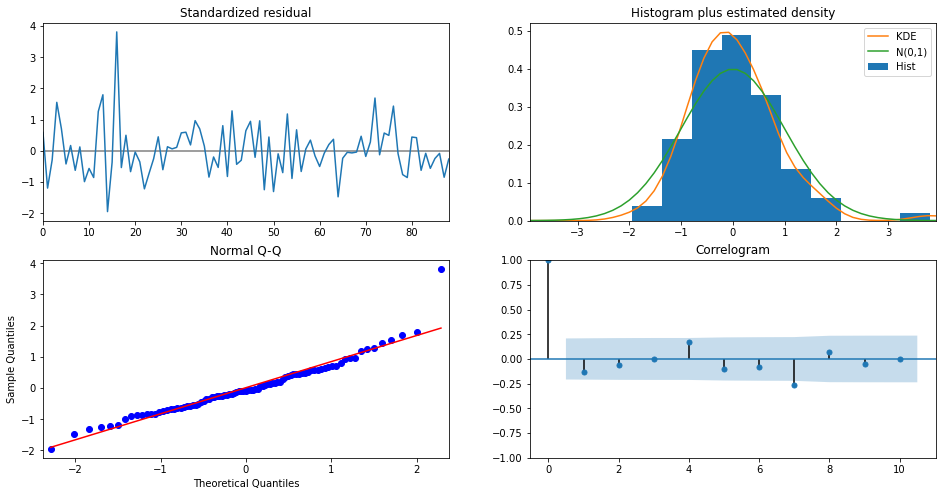

In [279]:
# I = 1 for no differentiation on data
# check which combination of values 
SARIMAX_model(SARIMAX(daily_df_2, order = (8,1,3))) 

                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   90
Model:               SARIMAX(7, 1, 5)   Log Likelihood                -931.038
Date:                Sun, 16 Aug 2020   AIC                           1888.076
Time:                        11:19:33   BIC                           1920.429
Sample:                             0   HQIC                          1901.117
                                 - 90                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7925      0.171    -10.487      0.000      -2.127      -1.457
ar.L2         -1.7521      0.181     -9.696      0.000      -2.106      -1.398
ar.L3         -1.7364      0.168    -10.359      0.0

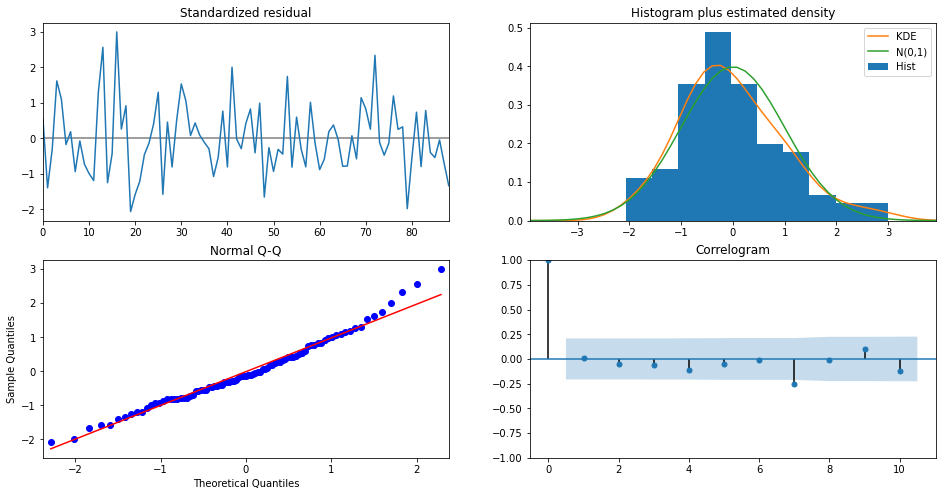

In [280]:
SARIMAX_model(SARIMAX(daily_df_2, order = (7,1,5))) 

                                      SARIMAX Results                                      
Dep. Variable:                              amount   No. Observations:                   90
Model:             SARIMAX(2, 1, 2)x(0, 1, [1], 7)   Log Likelihood                -860.658
Date:                             Sun, 16 Aug 2020   AIC                           1733.316
Time:                                     11:34:34   BIC                           1747.757
Sample:                                          0   HQIC                          1739.114
                                              - 90                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4853      0.220     -2.204      0.028      -0.917      -0.054
ar.L2         -0.4614      

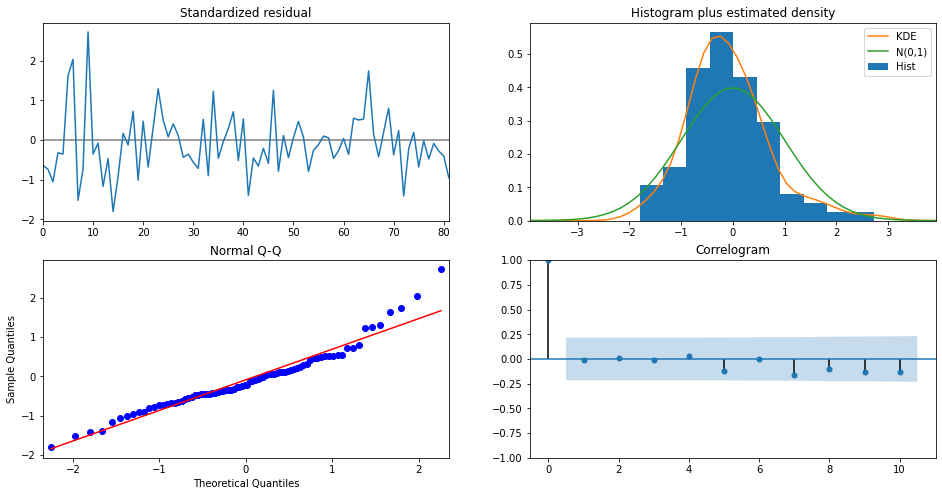

In [300]:
SARIMAX_model(SARIMAX(daily_df_2, order = (2,1,2),seasonal_order=(0,1,1,7))) 

### 3.3 Prediction

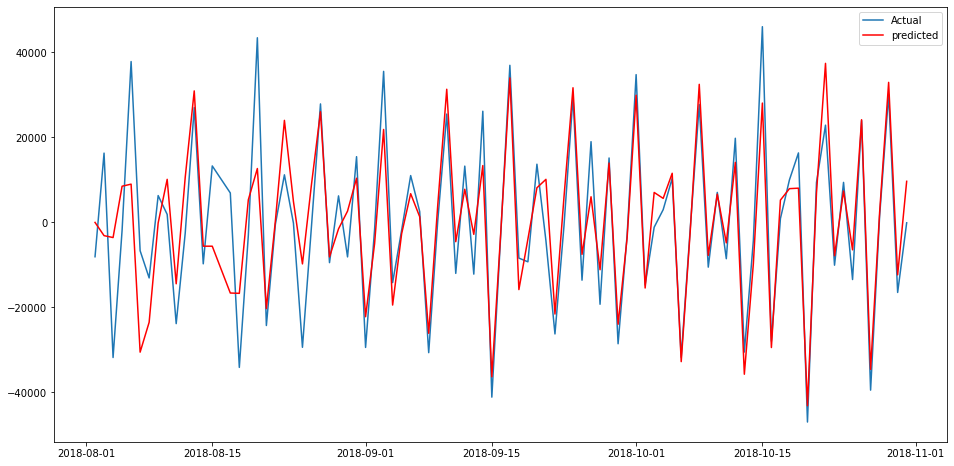

In [501]:
model = SARIMAX(daily_df_2, order = (2,1,2),seasonal_order=(0,1,1,7))
results = model.fit()
plt.figure(figsize=(16,8))
plt.plot(daily_df_2, label='Actual')
plt.plot(results.fittedvalues, color = 'r', label='predicted')
plt.legend()
plt.show()

In [502]:
def accuracy_metrics(pred,test):
    MAPE = np.mean(np.abs(test-pred)/np.abs(test))
    ME = np.mean(test-pred)
    MAE = np.mean(np.abs(test-pred))
    MPE = np.mean((test-pred)/test)
    RMSE = np.mean((test-pred)**2)**0.5
    R_2 = r2_score(test, pred)
    mins = np.amin(np.hstack([pred[:,None],test[:,None]]))
    maxs = np.amax(np.hstack([pred[:,None],test[:,None]]))
    MinMax = 1-np.mean(mins/maxs)
    return ({'MAPE':MAPE,'ME':ME,'MAE':MAE,'MPE':MPE,'RMSE':RMSE,'R_2':R_2,'MinMax':MinMax})

In [500]:
model = SARIMAX(daily_df_2, order = (8,1,3))
results = model.fit()
accuracy_metrics(pd.DataFrame(results.fittedvalues).values, daily_df_2.values)

{'MAPE': 1.907397839152004,
 'ME': 182.89057827773857,
 'MAE': 6879.627191698576,
 'MPE': 0.6561813529471179,
 'RMSE': 9748.998566151837,
 'R_2': 0.7710682786834822,
 'MinMax': 2.019943397184793}

In [511]:
model = SARIMAX(daily_df_2, order = (7,1,5))
results = model.fit()
accuracy_metrics(pd.DataFrame(results.fittedvalues).values, daily_df_2.values)

{'MAPE': 3.319285217386799,
 'ME': -18.03655370914162,
 'MAE': 7088.323517891358,
 'MPE': 2.1789817826109843,
 'RMSE': 9606.577367384249,
 'R_2': 0.7777082575340997,
 'MinMax': 2.063109844936827}

In [520]:
model = SARIMAX(daily_df_2, order = (2,1,2),seasonal_order=(0,1,1,7))
results = model.fit()
accuracy_metrics(pd.DataFrame(results.fittedvalues).values, daily_df_2.values)

{'MAPE': 2.698864705382823,
 'ME': -403.7893574201838,
 'MAE': 7356.487531432083,
 'MPE': 1.880280969388892,
 'RMSE': 9947.327195369822,
 'R_2': 0.7616589944153581,
 'MinMax': 2.019943397184793}

Mean of residuals: 0   -403.789357
dtype: float64


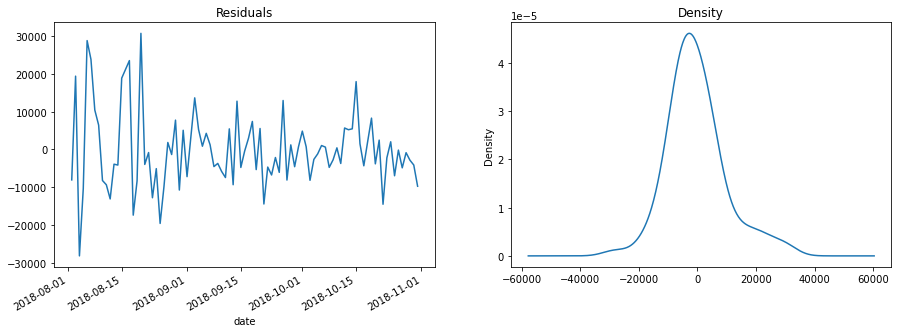

In [521]:
residuals = results.resid
fig,ax = plt.subplots(1, 2, figsize=(15,5))
residuals.plot(title = 'Residuals',ax=ax[0])
residuals.plot(kind = 'kde', title = 'Density',ax=ax[1])
print('Mean of residuals:', pd.DataFrame(residuals).mean())

In [522]:
def forcast(results,steps):
    forecast_object = results.get_forecast(steps=steps)
    # Extract predicted mean attribute

    mean = forecast_object.predicted_mean
    fixed_index = pd.date_range(daily_df_2.index[-1],periods = steps)
    mean_fixed = pd.DataFrame(mean,columns = ['Predicted_mean'])
    mean_fixed = mean_fixed.set_index(fixed_index)
    # Calculate the confidence intervals
    conf_int = forecast_object.conf_int()

    # Extract the forecast dates
    dates = mean_fixed.index

    plt.figure(figsize=(16,8))

    # Plot past CO2 levels
    plt.plot(daily_df_2.index, daily_df_2, label='past')

    # Plot the prediction means as line
    plt.plot(dates, mean, label='predicted')

    # Shade between the confidence intervals
    plt.fill_between(dates, conf_int.iloc[:,0], conf_int.iloc[:,1], alpha=0.2)

    # Plot legend and show figure
    plt.legend()

    plt.show()

    # Print last predicted mean
    print(mean.iloc[-1])

    # Print last confidence interval
    print(conf_int.iloc[-1])

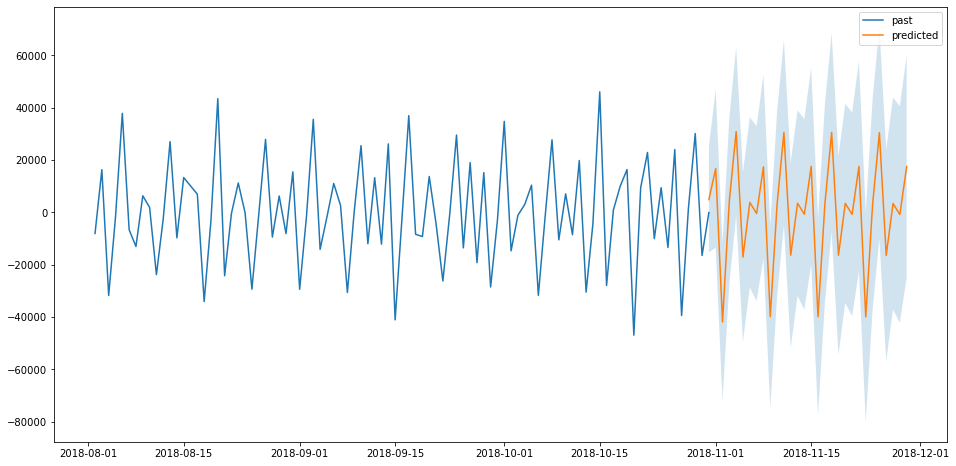

17496.23819485477
lower amount   -25001.059224
upper amount    59993.535614
Name: 119, dtype: float64


In [523]:
forcast(results,30)

In [524]:
daily_df_2.shape

(90, 1)

In [525]:
X_train = daily_df_2[:70]
X_test = daily_df_2[70:]

In [530]:
test_model = SARIMAX(X_train, order = (2,1,2),seasonal_order=(0,1,1,7))
fitted = test_model.fit()

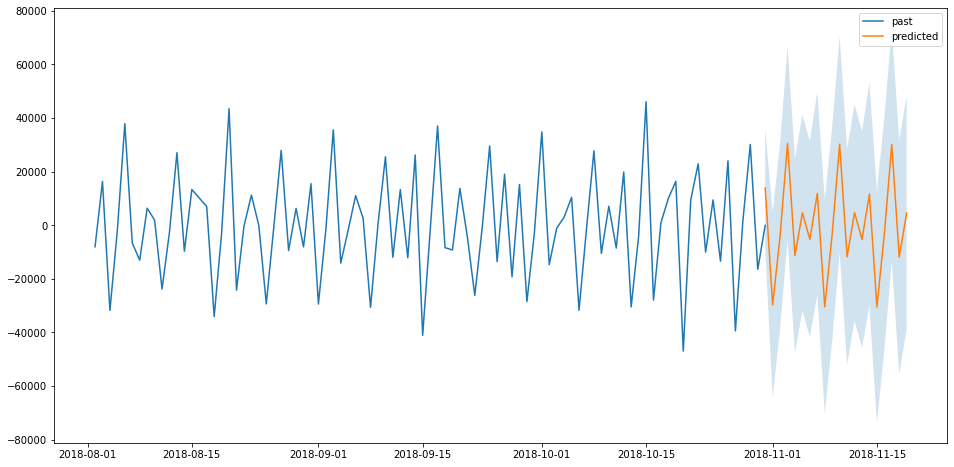

4595.115098127626
lower amount   -39056.423443
upper amount    48246.653639
Name: 89, dtype: float64


In [531]:
forcast(fitted,20)

In [532]:
predict = fitted.get_forecast(steps=20)

In [533]:
accuracy_metrics(pd.DataFrame(predict.predicted_mean).values, X_test.values)

{'MAPE': 3.202906074181262,
 'ME': 319.5098550893079,
 'MAE': 7447.346055055076,
 'MPE': 2.7413518639249452,
 'RMSE': 9213.877226440989,
 'R_2': 0.8473062309522631,
 'MinMax': 2.019943397184793}